In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


C:\Users\yuyuan\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin-1')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Text(0.5,1,'Number of ham and spam messages')

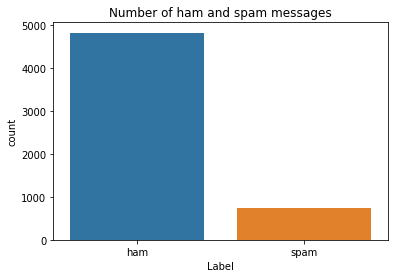

In [6]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [7]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [9]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)


In [10]:
def RNN():
    inputs = Input(shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1)(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model
    

In [11]:
model = RNN()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
__________

In [12]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [13]:
model.fit(sequences_matrix, Y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 65s 17ms/step - loss: 0.3540 - acc: 0.8619 - val_loss: 0.1359 - val_acc: 0.9652
Epoch 2/10
3788/3788 [==============================] - 78s 21ms/step - loss: 0.0925 - acc: 0.9802 - val_loss: 0.0438 - val_acc: 0.9895
Epoch 3/10
3788/3788 [==============================] - 43s 11ms/step - loss: 0.0466 - acc: 0.9879 - val_loss: 0.0435 - val_acc: 0.9905
Epoch 4/10
3788/3788 [==============================] - 56s 15ms/step - loss: 0.0380 - acc: 0.9879 - val_loss: 0.0339 - val_acc: 0.9895
Epoch 5/10
3788/3788 [==============================] - 64s 17ms/step - loss: 0.0297 - acc: 0.9905 - val_loss: 0.0331 - val_acc: 0.9916
Epoch 6/10
3788/3788 [==============================] - 64s 17ms/step - loss: 0.0260 - acc: 0.9921 - val_loss: 0.0344 - val_acc: 0.9916


In [19]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences = sequence.pad_sequences(test_sequences, maxlen=max_len)
accr = model.evaluate(test_sequences, Y_test)

836/836 [==============================] - 3s 4ms/step


In [21]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0], accr[1]))

Test set
 Loss: 0.079
 Accuracy: 0.982


In [32]:
text = 'hi, call me back when you have time.'
seq = tok.texts_to_sequences([text])
seq_matrix = sequence.pad_sequences(seq, maxlen=max_len)
pred = model.predict(seq_matrix)

